# Słowem wstępu

Pokazujemy EDA tych zbiorów, które mamy na obecnym etapie. Nie chcemy dopinać analiz jednak jeszcze na ostatni guzik, bo zarówno z tego co zaprezentujemy jak i po przekonsultowaniu tego, prawdopodobnie zbiorek będzie ewoluował.

Rozpoczęliśmy zbieranie danych z twittera, początkowe walki z ich API, ale i limity nałożone na dostęp do danych mocno by ograniczyły możliowści analiz Twittera pod kątem tematu naszego projektu.

Na szczęście z pomocą pojawia się narzędzie snscrape pod licencją GNU https://github.com/JustAnotherArchivist/snscrape.
Oferuje on sporą elastyczność i możliwości w scrapowaniu tweetów. Spośród wszystkich atrybutów jakie pojedyńczy tweet ma, decydujemy się na archiwizację: 'Datetime', 'Tweet Id','Text','Username','Replies Count','Retweets Count','Likes Count','Quotes Count', 'Language','Retweeted Tweet','Quoted Tweet','Mentioned Users', jako najbardziej przydatnych do dalszych analiz.

Obecnie najczęsciej filtrowaliśmy po keywordach, dacie, autorze oraz języku tweeta. 
Poniżej zestaw zbiór i jego query jako mały insight czego można się spodziewać:

DATA:
1. Bucha Genocide - 10k tweets - keyword "Bucha" - since 2022.04.03 - until 2022.04.05 - filename "bucha_10k.csv"                    DONE
2. First day of war - 100k tweets - keyword "Ukraine" - since 2022.02.24 - until 2022.02.25 - filename "russia_invades_ukraine_100k.csv"        DONE
3. FIFA suspends - 10k tweets - keyword "FIFA" - since 2022.02.28 - until 2022.02.29 - filename "fifa_suspends_10k.csv"                    DONE
4. UEFA suspends - 10k tweets - keyword "UEFA" - since 2022.02.28 - until 2022.02.29 - filename "uefa_suspends_10k.csv"                DONE
5. Apple bans Russia - 10k tweets - keyword "Apple" - since 2022.03.01 - until 2022.03.02 - filename "apple_ban_10k.csv"                DONE
6. Visa ban - 10k tweets - keyword "Visa" - since 2022.03.01 - until 2022.03.02 - filename "visa_ban_10k.csv"                        DONE
7. Mastercard ban - 10k tweets - keyword "Mastercard" - since 2022.03.01 - until 2022.03.02 - filename "mastercard_ban_10k.csv"                DONE
8. Ikea ban - 10k tweets - keyword "Ikea" - since 2022.03.03 - until 2022.03.04 - filename "ikea_ban_10k.csv"                        DONE
9. Nike ban - 10k tweets - keyword "Nike" - since 2022.03.03 - until 2022.03.04 - filename "nike_ban_10k.csv"                        DONE
10. Netflix ban - 10k tweets - keyword "Netflix" - since 2022.03.06 - until 2022.03.07 - filename "netflix_ban_10k.csv"                                DONE
11. Tiktok ban - 10k tweets - keyword "Tiktok" - since 2022.03.06 - until 2022.03.07 - filename "tiktok_ban_10k.csv"                                DONE
12. McDonald's ban - 10k tweets - keyword "McDonald's" - since 2022.03.08 - until 2022.03.09 - filename "mcdonalds_ban_10k.csv"                DONE
13. SWIFT ban - 50k tweets - keyword "SWIFT" - since 2022.03.02 - until 2022.03.03 - filename "swift_ban_50k.csv"                        DONE
14. MEPs - 2k per MEP - 'from:'+name+' since:2020-02-23 until:2022-04-12 lang:en' - filename ‘twitter_MEPs_2k_2y.csv’’                    DONE
15. Before_war - 100k tweets - keyword Ukraine - since 2022.02.22 - until 2022.02.22 - filename ‘twitter_Ukraine_02_22’                     DONE
16. Russian Twitter - 100k tweets (max) - keyword Ukraine - since 2022.02.24 - until 2022.02.25 - lang: ru - filename ‘russian_twitter_firstday_100k.csv’    DONE
17. Middle_of_2021 - 200k tweets - 'Ukraine since:2021-03-01 until:2021-09-01 lang:en' - filename ‘twitter_control_sample_200k_2021.csv’          DONE

Analiza będzie podzielona na 3 notebooki. Ten będzie poświęcony większym zbiorkom i danym w całości. Dwa odrębne do zbioru z rosyjskimi tweetami oraz jeden traktujący sankcje.

Zatem możemy zauważyć kilka większych zbiorów: 

Middle_of_2021 mający umożliwić dokonywanie porównań z czasami przed kompletnym zaostrzeniem się konfliktu.

Before_war jest jeszcze sprzed inwazji, jednakże pamiętajmy, że jest to już z intensywnego gromadzenia się wojsk na granicy.

Oraz 2 zbiory z pierwszego dnia inwazji jeden w języku angielskim, drugi po rosyjsku. 

Mamy także szereg zbiorków, który dotyczy najciekawszych naszym zdaniem sankcji nakładanych kolejno na państwo rosyjskie. Natomiast pierwszy Bucha Genocide ma zbierać tweety o masakrze dokonanej na ludności cywlinej na początku kwietnia w miejscowości Bucha.

# Imports

In [1]:
import spacy
import pandas as pd
from tqdm.auto import tqdm 
import swifter
import plotly.express as px
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import textacy
from collections import Counter
import random
import os
import pickle

from pathlib import Path
import ast

pd.options.plotting.backend = "plotly"
random.seed(123)

In [2]:
en = spacy.load("en_core_web_sm")

# utils

In [3]:
def cloud_from_lemmas(word_counts):
    wc = WordCloud(width=800, height=400)
    wc.generate_from_frequencies(frequencies=word_counts)
    plt.figure(figsize=(10,8))
    plt.imshow(wc)

def plot_counts(counts):
    fig = px.bar(counts,orientation='h', y='word', x='count')

    fig['layout']['yaxis']['autorange'] = "reversed"
    fig.update_layout(bargap=0.30, font={'size':10})
    return fig

# EDA

## MEPs

Zaczniemy od analizy tweetów wrzucanych przez MEPsów

In [4]:
df_MEPs = pd.read_csv("./data/twitter_MEPs_2k_2y.csv")

In [5]:
df_MEPs = df_MEPs.loc[df_MEPs['Language'] == 'en']#gdyby cos zle zostalo sklasyfikowane przez scraper, co czasem sie zdarza

In [6]:
df_MEPs

Unnamed: 0                   Datetime             Tweet Id  \
0                0  2022-04-08 06:00:00+00:00  1512309265641480192   
1                1  2022-04-07 15:55:58+00:00  1512096856410574851   
2                2  2022-04-07 10:32:25+00:00  1512015431866978305   
3                3  2022-04-07 07:20:02+00:00  1511967017779224577   
4                4  2022-04-06 12:29:20+00:00  1511682465362059269   
...            ...                        ...                  ...   
124170      124170  2020-03-19 07:27:22+00:00  1240540351418564614   
124171      124171  2020-03-08 08:20:55+00:00  1236567560558084097   
124172      124172  2020-03-06 15:29:25+00:00  1235950619279716353   
124173      124173  2020-02-27 09:54:30+00:00  1232967231732146176   
124174      124174  2020-02-26 13:26:16+00:00  1232658139364941824   

                                                     Text   Username  \
0       If I knew someone needed help, I would help th...   SCHIEDER   
1       EU, wake up! Don't leave West Balkans to Russi...   SCHIEDER   
2       Read here more how Europe must not disappoint ...   SCHIEDER   
3       Thank you for the good exchange about the curr...   SCHIEDER   
4       EU needs to be more active to end this crisis,...   SCHIEDER   
...                                                   ...        ...   
124170         There a no limits. https://t.co/w5VQk4TovP  tomastobe   
124171  Today is International Women's Day.\nAs Chair ...  tomastobe   
124172                                    @Kribberg Tack!  tomastobe   
124173  EU development policy needs a fresh start. Dev...  tomastobe   
124174  I strongly condemn that 1/3 of Poland is now d...  tomastobe   

        Replies Count  Retweets Count  Likes Count  Quotes Count Language  \
0                   0               0            4             0       en   
1                   0               0            5             0       en   
2                   0               0            1             0       en   
3                   0               4           26             1       en   
4                   1               0            3             0       en   
...               ...             ...          ...           ...      ...   
124170              0               0            5             0       en   
124171              1               1           10             0       en   
124172              0               0            0             0       en   
124173              0               8           14             1       en   
124174             12              23          110             0       en   

        Retweeted Tweet                                       Quoted Tweet  \
0                   NaN                                                NaN   
1                   NaN                                                NaN   
2                   NaN                                                NaN   
3                   NaN                                                NaN   
4                   NaN                                                NaN   
...                 ...                                                ...   
124170              NaN  https://twitter.com/Lagarde/status/12404149189...   
124171              NaN                                                NaN   
124172              NaN                                                NaN   
124173              NaN                                                NaN   
124174              NaN                                                NaN   

                      Mentioned Users  
0                        ['ZiobroPL']  
1                                 NaN  
2                                 NaN  
3       ['anlifirat', 'bediaozgokce']  
4                                 NaN  
...                               ...  
124170                            NaN  
124171                            NaN  
124172                   ['Kribberg']  
124173                      ['euobs']  


In [7]:
MEPs_dict = Path('meps_string.txt').read_text().replace('\n', '')
MEPs_dict = ast.literal_eval(MEPs_dict)
MEPs_dict

{'MEPsAustria': ['SCHIEDER',
  'AngelikaWinzig',
  'thalerbarbara',
  'VollathBettina',
  'dieGamon',
  'Evelyn_Regner',
  'georgmayermep',
  'HannesHeide',
  'vilimsky',
  'lukasmandl',
  'MonikaVana',
  'othmar_karas',
  'thomaswaitz'],
 'MEPsBelgium': ['Assita_Kanko',
  'BenoitLutgen',
  'FranssenCindy',
  'Frederiqueries',
  'GeertBourgeois',
  'gannemans',
  'guyverhofstadt',
  'hildevautmans',
  'jvanovertveldt',
  'kvanbrempt',
  'BotengaM',
  'marctarabella',
  'Mariearenaps',
  'OChastel',
  'pascal_arimont',
  'ph_lamberts',
  'msaraswati',
  'saskiabricmont',
  'TomVandendriese',
  'tomvdkendelaere'],
 'MEPsBulgaria': ['andreykovatchev',
  'AndreyNovakov',
  'AndreySlabakov',
  'djambazki',
  'AdemovAsim',
  'AtidzheV',
  'ElenaYoncheva',
  'Emil_Radev',
  'EvaMaydell',
  'ilhankyuchyuk',
  'Iskra_Mihaylova',
  'IvoHristovMEP',
  'PetarVitanovMEP',
  'rmkanev',
  'SergeiStanishev',
  'tsvetypenkova'],
 'MEPsCroatia': ['BiljanaBorzan',
  'IvanVilibor',
  'KarloRessler',
  'la

In [8]:
df_MEPs.drop(columns=['Unnamed: 0', 'Language'], inplace = True)

Na tak dużym wszystko wykonywało się bardzo długo, ograniczmy sie do czasu zaostrzenia konfliktu.

In [9]:
df_MEPs = df_MEPs[(df_MEPs['Datetime'] > '2022-02-24')]

In [10]:
df_MEPs["Text_en"] = df_MEPs['Text'].swifter.apply(en)

Pandas Apply:   0%|          | 0/11012 [00:00<?, ?it/s]

C:\Users\jakub\AppData\Local\Temp/ipykernel_1476/1443730082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MEPs["Text_en"] = df_MEPs['Text'].swifter.apply(en)


In [11]:
df_MEPs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11012 entries, 0 to 124045
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Datetime         11012 non-null  object 
 1   Tweet Id         11012 non-null  int64  
 2   Text             11012 non-null  object 
 3   Username         11012 non-null  object 
 4   Replies Count    11012 non-null  int64  
 5   Retweets Count   11012 non-null  int64  
 6   Likes Count      11012 non-null  int64  
 7   Quotes Count     11012 non-null  int64  
 8   Retweeted Tweet  0 non-null      float64
 9   Quoted Tweet     2666 non-null   object 
 10  Mentioned Users  5300 non-null   object 
 11  Text_en          11012 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.3+ MB


### dlugosci tweetow

In [12]:
doc_lens = df_MEPs["Text_en"].str.len()

doc_lens.hist(log_y=True)

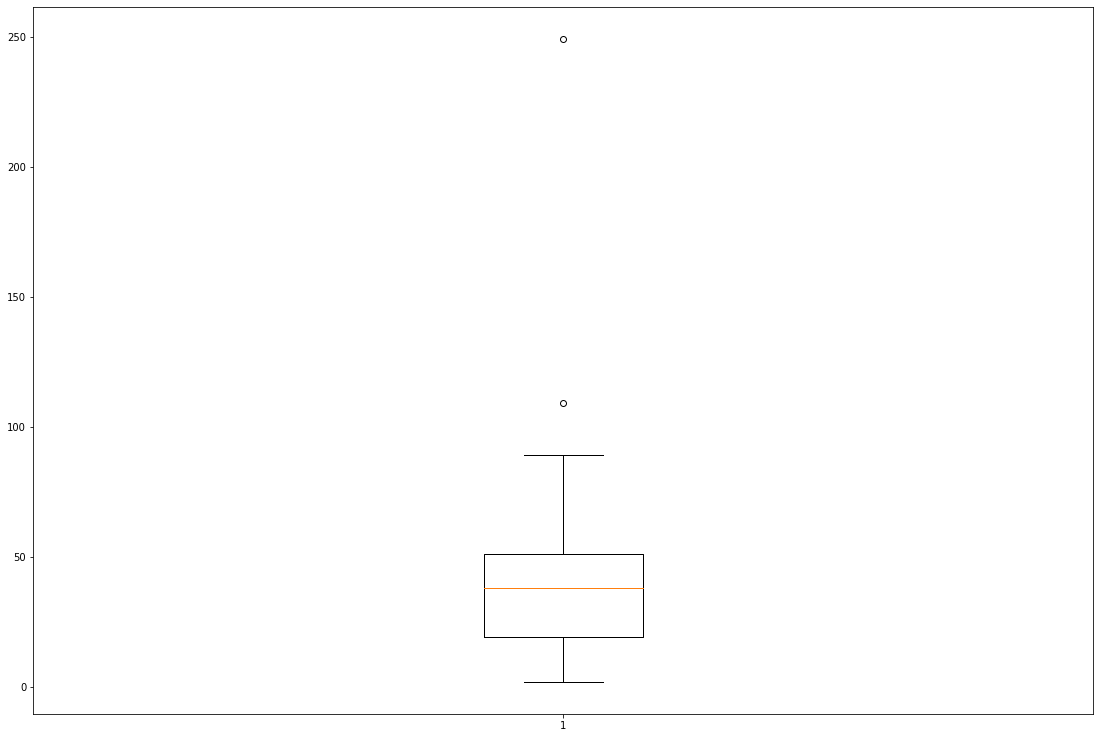

In [13]:
fig, ax = plt.subplots(figsize=(19, 13))
ax.boxplot(doc_lens)
plt.show()

Przez bardzo długi czas wykonywania się zapytań, ograniczmy się do tweetów z czasów wojny.

In [19]:
not_interesting = set(["\n", "\n\n", "🇺", "🇦", " ", "", '🇷', '👇', 'amp'])
lemmas = df_MEPs.Text_en.apply(lambda doc: [token.lemma_ for token in doc if not token.is_stop if not token.is_punct if not token.lemma_ in not_interesting])

In [20]:
word_counts = Counter(lemmas.sum())

In [21]:
counts = pd.DataFrame(Counter({k: v for k, v in word_counts.items()}).most_common(60), columns=['word', 'count'])

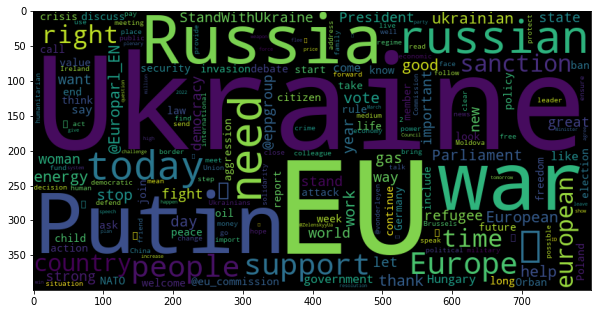

In [22]:
cloud_from_lemmas(word_counts)

In [23]:
plot_counts(counts)

In [24]:
not_interesting = {'the', '@', 'a', 'this'}

lemmas_ngrams = df_MEPs.Text_en.apply(lambda doc: list(doc.noun_chunks))
lemmas_ngrams = lemmas_ngrams.apply(lambda x: [''.join(str(el)) for el in x if len(el) == 2])
lemmas_ngrams = lemmas_ngrams.apply(lambda w: [x for x in w if len(x.split())==2])
lemmas_ngrams = lemmas_ngrams.apply(lambda w: [x for x in w if x.split()[0].lower() not in not_interesting if x.split()[1].lower() not in not_interesting])

word_counts_ngrams = dict(Counter(lemmas_ngrams.sum()).most_common(30))


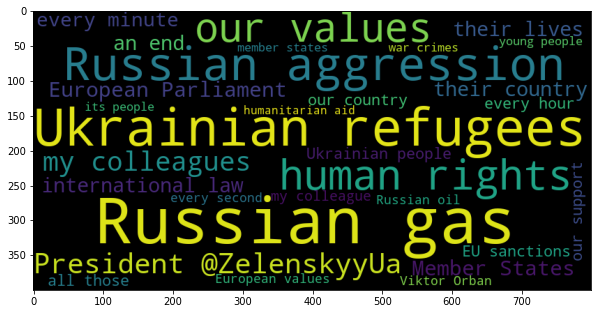

In [25]:
cloud_from_lemmas(word_counts_ngrams)

In [26]:
counts_ngrams = pd.DataFrame(Counter({k: v for k, v in word_counts_ngrams.items()}).most_common(60), columns=['word', 'count'])
plot_counts(counts_ngrams)

Pojawiające się zbitki słów wydają się bardzo właściwe dla naszego tematu. Pokazują, że niesienie wsparcia jest istotne oraz jasno wskazywany jest agresor w ogólnej narracji. Niemniej jednak w debacie publicznej wyraźnie pokazuje się znaczenie Rosji w przemyśle energetycznym.

In [27]:
not_interesting = {'the', '@', 'a', 'this'}

lemmas_ngrams = df_MEPs.Text_en.apply(lambda doc: list(doc.noun_chunks))
lemmas_ngrams = lemmas_ngrams.apply(lambda x: [''.join(str(el)) for el in x if len(el) == 3])
lemmas_ngrams = lemmas_ngrams.apply(lambda w: [x for x in w if len(x.split())==3])
lemmas_ngrams = lemmas_ngrams.apply(lambda w: [x for x in w if x.split()[0].lower() not in not_interesting if x.split()[1].lower() not in not_interesting if x.split()[2].lower() not in not_interesting])

word_counts_ngrams = dict(Counter(lemmas_ngrams.sum()).most_common(30))


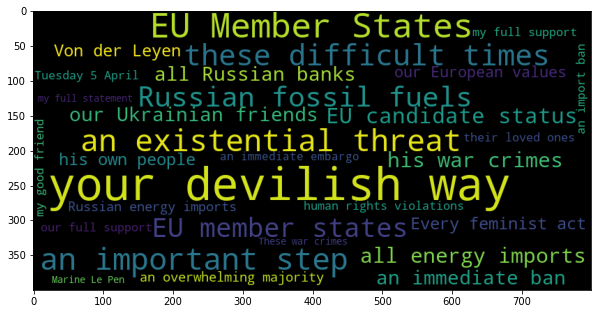

In [28]:
cloud_from_lemmas(word_counts_ngrams)

In [29]:
counts_ngrams = pd.DataFrame(Counter({k: v for k, v in word_counts_ngrams.items()}).most_common(60), columns=['word', 'count'])
plot_counts(counts_ngrams)

In [34]:
for x in df_MEPs['Text']:
    if 'your devilish way' in x:
        print(x+'\n')

@mfa_russia @NATO Lies; every day, every hour, every minute, every second. Repent, and turn from your devilish way #PutinWarCriminal

@RussianEmbassy @mfa_russia @RusembUkraine @RusEmbUSA @RusMission_EU @BBCWorld @SkyNews @ftworldnews @guardianworld @TelegraphWorld @spectator 200% #fakenews and total lies; every day, every hour, every minute, every second. Repent, and turn from your devilish way #Lavrov #Putin @KremlinRussia 🇷🇺

@RussianEmbassy @mfa_russia @RusembUkraine @AmbRusFrance @RusBotschaft @RusMission_EU @BBCWorld @SkyNews @ftworldnews @TelegraphWorld @guardianworld We in 🇳🇱 know about 🇷🇺 lies because of #MH17 .And here, again; lies =&gt; every day, every hour, every minute, every second. Repent, and turn from your devilish way #Putin #Lavrov @KremlinRussia

@RussianEmbassy @mfa_russia @RusembUkraine @RusMission_EU @RusEmbUSA @RussiaUN @BBCWorld @REESOxford @SkyNews @ftworldnews @guardianworld Lies; every day, every hour, every minute, every second. Repent, and turn from your 

Popularnym było umieszczanie tej samej frazy w wielu tweetach tworząc pewien trend. Wyjaśnia to tez popularność ngramów every minute, second etc. widocznych 2 wykresy wyżej.

In [54]:
top_10_likes = df_MEPs.sort_values(by=['Likes Count'], ascending=False).head(10).Text
for l in top_10_likes: print(l+'\n\n')

🇨🇦🇬🇧|Yesterday, Canada's Prime Minister @JustinTrudeau  visited the #EU Parliament to give a speech. I took the opportunity to give him an appropriate "welcome" there. Short, concise and right hitting the bull's eye! #ID https://t.co/qpcQyGTixQ


Your strategy of incremental sanctions doesn’t work. Cannot work…

That’s why 212 members of Parliament demand a special #EUCO meeting to decide on full sanctions immediately! 

My speech👇🏻 https://t.co/MFCtmboaf4


THREAD 1/7 Intel from a Ukrainian officer about a meeting in Putin’s lair in Urals. Oligarchs convened there so no one would flee. Putin is furious, he thought that the whole war would be easy and everything would be done in 1-4 days. @EPPGroup @general_ben @edwardlucas @politico https://t.co/8AoelUDWM9


PM Trudeau, in recent months, under your quasi-liberal boot, Canada 🇨🇦 has become a symbol of civil rights violations. The methods we have witnessed may be liberal to you, but to many citizens around the🌎it seemed like a dictators

Powyżej dosyć ciekawe zestawienie 10 najbardziej lajkowanych tweetów. 

'Your strategy of incremental sanctions doesn’t work. Cannot work…' 

co do związku niektorych z sytuacją na Ukrainie możemy być niemal pewni. Pamiętajmy jednak, że w zbiorze bedzię znajdywało się na chwiele obecną wiele tweetów MEPsów na tematy inne niż Ukraina. Filtrowanie zostało zaaplikowane jedynie po dacie, nie po keywordach.

### countries

In [55]:
df_MEPs

Datetime             Tweet Id  \
0       2022-04-08 06:00:00+00:00  1512309265641480192   
1       2022-04-07 15:55:58+00:00  1512096856410574851   
2       2022-04-07 10:32:25+00:00  1512015431866978305   
3       2022-04-07 07:20:02+00:00  1511967017779224577   
4       2022-04-06 12:29:20+00:00  1511682465362059269   
...                           ...                  ...   
124041  2022-02-27 11:02:16+00:00  1497889816649904130   
124042  2022-02-25 20:18:03+00:00  1497304908940333061   
124043  2022-02-24 13:25:30+00:00  1496838698188611588   
124044  2022-02-24 10:00:10+00:00  1496787027156627459   
124045  2022-02-24 09:59:30+00:00  1496786857455149056   

                                                     Text   Username  \
0       If I knew someone needed help, I would help th...   SCHIEDER   
1       EU, wake up! Don't leave West Balkans to Russi...   SCHIEDER   
2       Read here more how Europe must not disappoint ...   SCHIEDER   
3       Thank you for the good exchange about the curr...   SCHIEDER   
4       EU needs to be more active to end this crisis,...   SCHIEDER   
...                                                   ...        ...   
124041  More than 360 000 Ukrainians now displaced in ...  tomastobe   
124042  Today Russia threatened Sweden 🇸🇪and Finland 🇫...  tomastobe   
124043  Ukraine urgently needs medical aid items follo...  tomastobe   
124044  The geopolitical realities in our neighbourhoo...  tomastobe   
124045  We must now ensure safe passage and effective ...  tomastobe   

        Replies Count  Retweets Count  Likes Count  Quotes Count  \
0                   0               0            4             0   
1                   0               0            5             0   
2                   0               0            1             0   
3                   0               4           26             1   
4                   1               0            3             0   
...               ...             ...          ...           ...   
124041              1               8           24             0   
124042              7              74          503             1   
124043              2               6           19             0   
124044              0               1           11             0   
124045              3               4           21             0   

        Retweeted Tweet                                       Quoted Tweet  \
0                   NaN                                                NaN   
1                   NaN                                                NaN   
2                   NaN                                                NaN   
3                   NaN                                                NaN   
4                   NaN                                                NaN   
...                 ...                                                ...   
124041              NaN                                                NaN   
124042              NaN                                                NaN   
124043              NaN  https://twitter.com/JanezLenarcic/status/14968...   
124044              NaN                                                NaN   
124045              NaN                                                NaN   

                      Mentioned Users  \
0                        ['ZiobroPL']   
1                                 NaN   
2                                 NaN   
3       ['anlifirat', 'bediaozgokce']   
4                                 NaN   
...                               ...   
124041                            NaN   
124042                            NaN   
124043              ['JanezLenarcic']   
124044                            NaN   
124045                            NaN   

                                                  Text_en      country  
0       (If, I, knew, someone, needed, help, ,, I, wou...  MEPsAustria  
1       (EU, ,, wake, up, !, Do, n't, leave, West, Bal...  MEPsAustria

In [56]:
df_MEPs['country'] = [None]*(11012)

C:\Users\jakub\AppData\Local\Temp/ipykernel_1476/2147309972.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
for i in df_MEPs.index:
    
    
    try:
        df_MEPs['country'][i] = [c_name for c_name, MEPs_names in MEPs_dict.items() if df_MEPs.iloc[[i]].Username.values[0] in MEPs_names][0]
    except IndexError:
        #df_MEPs.iloc[[i]].Country = None
        continue

    #df_MEPs.iloc[[i]].Country = [c_name for c_name, MEPs_names in MEPs_dict.items() if df_MEPs.iloc[[i]].Username.values[0] in MEPs_names][0]

C:\Users\jakub\AppData\Local\Temp/ipykernel_1476/2082221353.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
df_MEPs

Datetime             Tweet Id  \
0       2022-04-08 06:00:00+00:00  1512309265641480192   
1       2022-04-07 15:55:58+00:00  1512096856410574851   
2       2022-04-07 10:32:25+00:00  1512015431866978305   
3       2022-04-07 07:20:02+00:00  1511967017779224577   
4       2022-04-06 12:29:20+00:00  1511682465362059269   
...                           ...                  ...   
124041  2022-02-27 11:02:16+00:00  1497889816649904130   
124042  2022-02-25 20:18:03+00:00  1497304908940333061   
124043  2022-02-24 13:25:30+00:00  1496838698188611588   
124044  2022-02-24 10:00:10+00:00  1496787027156627459   
124045  2022-02-24 09:59:30+00:00  1496786857455149056   

                                                     Text   Username  \
0       If I knew someone needed help, I would help th...   SCHIEDER   
1       EU, wake up! Don't leave West Balkans to Russi...   SCHIEDER   
2       Read here more how Europe must not disappoint ...   SCHIEDER   
3       Thank you for the good exchange about the curr...   SCHIEDER   
4       EU needs to be more active to end this crisis,...   SCHIEDER   
...                                                   ...        ...   
124041  More than 360 000 Ukrainians now displaced in ...  tomastobe   
124042  Today Russia threatened Sweden 🇸🇪and Finland 🇫...  tomastobe   
124043  Ukraine urgently needs medical aid items follo...  tomastobe   
124044  The geopolitical realities in our neighbourhoo...  tomastobe   
124045  We must now ensure safe passage and effective ...  tomastobe   

        Replies Count  Retweets Count  Likes Count  Quotes Count  \
0                   0               0            4             0   
1                   0               0            5             0   
2                   0               0            1             0   
3                   0               4           26             1   
4                   1               0            3             0   
...               ...             ...          ...           ...   
124041              1               8           24             0   
124042              7              74          503             1   
124043              2               6           19             0   
124044              0               1           11             0   
124045              3               4           21             0   

        Retweeted Tweet                                       Quoted Tweet  \
0                   NaN                                                NaN   
1                   NaN                                                NaN   
2                   NaN                                                NaN   
3                   NaN                                                NaN   
4                   NaN                                                NaN   
...                 ...                                                ...   
124041              NaN                                                NaN   
124042              NaN                                                NaN   
124043              NaN  https://twitter.com/JanezLenarcic/status/14968...   
124044              NaN                                                NaN   
124045              NaN                                                NaN   

                      Mentioned Users  \
0                        ['ZiobroPL']   
1                                 NaN   
2                                 NaN   
3       ['anlifirat', 'bediaozgokce']   
4                                 NaN   
...                               ...   
124041                            NaN   
124042                            NaN   
124043              ['JanezLenarcic']   
124044                            NaN   
124045                            NaN   

                                                  Text_en      country  
0       (If, I, knew, someone, needed, help, ,, I, wou...  MEPsAustria  
1       (EU, ,, wake, up, !, Do, n't, leave, West, Bal...  MEPsAustria

### Germany

In [59]:
df_Germany = df_MEPs[(df_MEPs['country'] == 'MEPsGermany')]

In [60]:
df_Germany

Datetime             Tweet Id  \
1971  2022-02-24 18:31:00+00:00  1496915582565900296   
1972  2022-02-24 18:30:36+00:00  1496915480858312709   
1973  2022-02-24 17:25:27+00:00  1496899085663711238   
1974  2022-02-24 15:08:46+00:00  1496864685555130369   
1975  2022-02-24 12:48:41+00:00  1496829435739197440   
...                         ...                  ...   
4305  2022-02-24 12:58:29+00:00  1496831900031545353   
4306  2022-02-24 12:10:46+00:00  1496819893764825089   
4307  2022-02-24 08:42:25+00:00  1496767459495497728   
4308  2022-02-24 07:56:50+00:00  1496755988266897408   
4309  2022-02-24 07:16:51+00:00  1496745924755738624   

                                                   Text       Username  \
1971                    Indeed. https://t.co/kvB5dVATiN   Assita_Kanko   
1972                 @amanpour @jensstoltenberg Indeed.   Assita_Kanko   
1973  Living without war is a blessing we easily tak...   Assita_Kanko   
1974  "Many Ukrainians are ready to fight”, said my ...   Assita_Kanko   
1975  @paepeilse @HowcanImakethi1 Nope nothing to do...   Assita_Kanko   
...                                                 ...            ...   
4305  Tonight at 18:30/19:00👉Extraordinary @EP_Forei...  hildevautmans   
4306  Enough wake-up calls! The EU must urgently dou...  hildevautmans   
4307  War in Europe, simply because of illusions of ...  hildevautmans   
4308  The European Parliament must and shall play it...  hildevautmans   
4309  This is a sad moment in history. War in Europe...  hildevautmans   

      Replies Count  Retweets Count  Likes Count  Quotes Count  \
1971              3               4           22             0   
1972              0               0            1             0   
1973              1               9           72             0   
1974              0               5           13             1   
1975              4               0            1             0   
...             ...             ...          ...           ...   
4305              0               2            3             0   
4306              0               0            2             0   
4307              0               1           16             0   
4308              1               1            7             0   
4309             10              44          189             2   

      Retweeted Tweet                                       Quoted Tweet  \
1971              NaN  https://twitter.com/amanpour/status/1496915136...   
1972              NaN                                                NaN   
1973              NaN                                                NaN   
1974              NaN                                                NaN   
1975              NaN                                                NaN   
...               ...                                                ...   
4305              NaN                                                NaN   
4306              NaN                                                NaN   
4307              NaN                                                NaN   
4308              NaN                                                NaN   
4309              NaN                                                NaN   

                                        Mentioned Users  \
1971                                                NaN   
1972                    ['amanpour', 'jensstoltenberg']   
1973                                                NaN   
1974                                                NaN   
1975                   ['paepeilse', 'HowcanImakethi1']   
...                                                 ...   
4305  ['EP_ForeignAff', 'EP_Defence', 'JosepBorrellF...   
4306                                                NaN   
4307                                                NaN   
4308     ['EP_ForeignAff', 'EP_Defence', 'Europarl_EN']   
4309                                                NaN   

                                              

In [64]:
not_interesting = set(["\n", "\n\n", "🇺", "🇦", " ", "", '🇷', '👇', 'amp'])
lemmas_G = df_Germany.Text_en.apply(lambda doc: [token.lemma_ for token in doc if not token.is_stop if not token.is_punct if not token.lemma_ in not_interesting])

In [65]:
word_counts_G = Counter(lemmas_G.sum())

In [66]:
counts_G = pd.DataFrame(Counter({k: v for k, v in word_counts.items()}).most_common(60), columns=['word', 'count'])

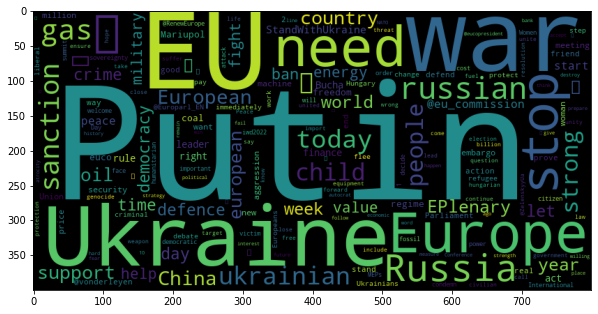

In [67]:
cloud_from_lemmas(word_counts_G)

In [68]:
plot_counts(counts_G)

In [69]:
not_interesting = {'the', '@', 'a', 'this'}

lemmas_ngrams = df_Germany.Text_en.apply(lambda doc: list(doc.noun_chunks))
lemmas_ngrams = lemmas_ngrams.apply(lambda x: [''.join(str(el)) for el in x if len(el) == 2])
lemmas_ngrams = lemmas_ngrams.apply(lambda w: [x for x in w if len(x.split())==2])
lemmas_ngrams = lemmas_ngrams.apply(lambda w: [x for x in w if x.split()[0].lower() not in not_interesting if x.split()[1].lower() not in not_interesting])

word_counts_ngrams = dict(Counter(lemmas_ngrams.sum()).most_common(30))


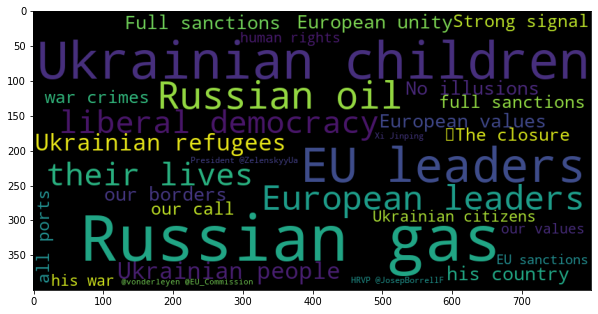

In [70]:
cloud_from_lemmas(word_counts_ngrams)

In [71]:
counts_ngrams = pd.DataFrame(Counter({k: v for k, v in word_counts_ngrams.items()}).most_common(60), columns=['word', 'count'])
plot_counts(counts_ngrams)

In [72]:
not_interesting = {'the', '@', 'a', 'this'}

lemmas_ngrams = df_Germany.Text_en.apply(lambda doc: list(doc.noun_chunks))
lemmas_ngrams = lemmas_ngrams.apply(lambda x: [''.join(str(el)) for el in x if len(el) == 3])
lemmas_ngrams = lemmas_ngrams.apply(lambda w: [x for x in w if len(x.split())==3])
lemmas_ngrams = lemmas_ngrams.apply(lambda w: [x for x in w if x.split()[0].lower() not in not_interesting if x.split()[1].lower() not in not_interesting if x.split()[2].lower() not in not_interesting])

word_counts_ngrams = dict(Counter(lemmas_ngrams.sum()).most_common(30))


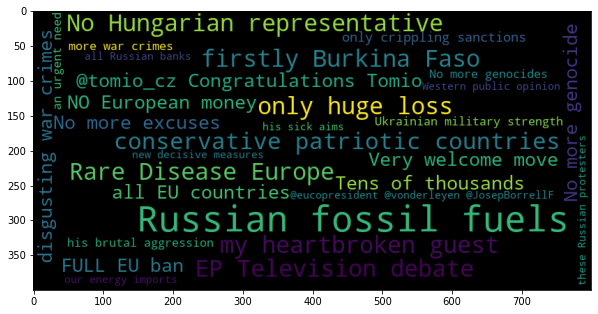

In [73]:
cloud_from_lemmas(word_counts_ngrams)

In [74]:
counts_ngrams = pd.DataFrame(Counter({k: v for k, v in word_counts_ngrams.items()}).most_common(60), columns=['word', 'count'])
plot_counts(counts_ngrams)#count tylko 1

In [75]:
top_15_likes = df_Germany.sort_values(by=['Likes Count'], ascending=False).head(10).Text
for l in top_15_likes: print(l+'\n\n')

Your strategy of incremental sanctions doesn’t work. Cannot work…

That’s why 212 members of Parliament demand a special #EUCO meeting to decide on full sanctions immediately! 

My speech👇🏻 https://t.co/MFCtmboaf4


BREAKING - European Parliament want immediate and full fossil fuel embargo !

No gas, no oil, no coal… 

NO European money for Putin’s army !

🛑 https://t.co/sh46e1ehiS


Johnson's comparaison of the courageous fight of Ukraine with Brexit is insane…

Brexit was about undoing freedoms and leaving the EU…Ukrainians want more freedom and to join the EU! https://t.co/DOtaNTpiWN


Ukrainian people ask for EU membership, they reject the tyranny &amp; violence of Putin's regime.

Tomorrow, the European Parliament will ask that #Ukraine is declared a candidate country. 🇺🇦🇪🇺 #StandWithUkraine https://t.co/SoTn29OWmd


After #Bucha how can European leaders justify continuing to buy Russian gas and finance Putin’s criminal war machine ? 

Full ban immediately ! https://t.co/DrwZnYFCA

### Poland

In [76]:
df_Germany = df_MEPs[(df_MEPs['country'] == 'MEPsPoland')] #pozostaje nazwa df!!

In [77]:
df_Germany

Datetime             Tweet Id  \
8000  2022-03-17 20:18:24+00:00  1504552752843833346   
8008  2022-04-11 10:58:36+00:00  1513471574120316932   
8009  2022-04-08 16:39:36+00:00  1512470223793889289   
8010  2022-04-08 11:30:42+00:00  1512392488341934092   
8011  2022-04-08 09:14:18+00:00  1512358161214328833   
...                         ...                  ...   
8137  2022-02-24 16:40:59+00:00  1496887894375600129   
8138  2022-02-24 15:46:48+00:00  1496874256591994880   
8139  2022-02-24 11:51:00+00:00  1496814916149424134   
8140  2022-02-24 09:16:05+00:00  1496775930827661312   
8141  2022-02-24 08:54:14+00:00  1496770431637856257   

                                                   Text    Username  \
8000  Unprecedented political revenge is incompatibl...  Emil_Radev   
8008  Multilateralism and collective #security among...  EvaMaydell   
8009  Russian #Cyberattacks and airspace violations ...  EvaMaydell   
8010  The bombing of #Kramatorsk train station is ho...  EvaMaydell   
8011  Interesting read from @POLITICOEurope \n\nLook...  EvaMaydell   
...                                                 ...         ...   
8137  We didn't do it in 2014 and now we regret it. ...  EvaMaydell   
8138  Absolutely heartbreaking to think of the child...  EvaMaydell   
8139  Ahead of #EUCO tonight: It’s no longer about w...  EvaMaydell   
8140  “One lie is enough to question all truths”\n\n...  EvaMaydell   
8141  An independent, sovereign European country is ...  EvaMaydell   

      Replies Count  Retweets Count  Likes Count  Quotes Count  \
8000              6               2            4             1   
8008              0               2            7             0   
8009              1              16           28             1   
8010              0               3           13             0   
8011              0               1            3             0   
...             ...             ...          ...           ...   
8137              1               7           26             0   
8138              1               5           35             0   
8139              4               4           13             0   
8140              0               8           21             0   
8141              0               7           15             0   

      Retweeted Tweet                                       Quoted Tweet  \
8000              NaN                                                NaN   
8008              NaN  https://twitter.com/thetimes/status/1513415540...   
8009              NaN                                                NaN   
8010              NaN  https://twitter.com/Reuters/status/15123516882...   
8011              NaN  https://twitter.com/POLITICOEurope/status/1512...   
...               ...                                                ...   
8137              NaN  https://twitter.com/ZelenskyyUa/status/1496876...   
8138              NaN                                                NaN   
8139              NaN                                                NaN   
8140              NaN  https://twitter.com/jseldin/status/14967072364...   
8141              NaN                                                NaN   

         Mentioned Users                                            Text_en  \
8000                 NaN  (Unprecedented, political, revenge, is, incomp...   
8008                 NaN  (Multilateralism, and, collective, #, security...   
8009                 NaN  (Russian, #, Cyberattacks, and, airspace, viol...   
8010                 NaN  (The, bombing, of, #, Kramatorsk, train, stati...   
8011  ['POLITICOEurope']  (Interesting, read, from, @POLITICOEurope, \n\...   
...                  ...                                                ...   
8137                 NaN  (We, did, n't, do, it, in, 2014, and, now, we,...   
8138                 NaN  (Absolutely, heartbreaking, to, think, of, the...   
8139                 NaN  (Ahead, of, #, EUCO, tonight, :, It, ’s, no, l...   
8

In [80]:
not_interesting = set(["\n", "\n\n", "🇺", "🇦", " ", "", '🇷', '👇', 'amp'])
lemmas_G = df_Germany.Text_en.apply(lambda doc: [token.lemma_ for token in doc if not token.is_stop if not token.is_punct if not token.lemma_ in not_interesting])

In [81]:
word_counts_G = Counter(lemmas_G.sum())

In [82]:
counts_G = pd.DataFrame(Counter({k: v for k, v in word_counts_G.items()}).most_common(60), columns=['word', 'count'])

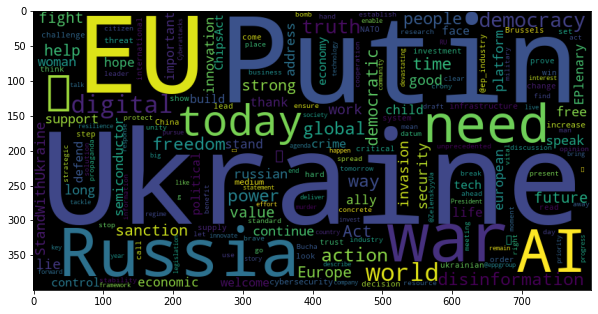

In [83]:
cloud_from_lemmas(word_counts_G)

In [84]:
plot_counts(counts_G)

In [85]:
not_interesting = {'the', '@', 'a', 'this'}

lemmas_ngrams = df_Germany.Text_en.apply(lambda doc: list(doc.noun_chunks))
lemmas_ngrams = lemmas_ngrams.apply(lambda x: [''.join(str(el)) for el in x if len(el) == 2])
lemmas_ngrams = lemmas_ngrams.apply(lambda w: [x for x in w if len(x.split())==2])
lemmas_ngrams = lemmas_ngrams.apply(lambda w: [x for x in w if x.split()[0].lower() not in not_interesting if x.split()[1].lower() not in not_interesting])

word_counts_ngrams = dict(Counter(lemmas_ngrams.sum()).most_common(30))


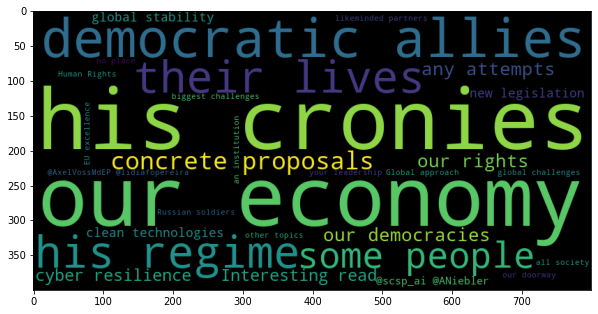

In [86]:
cloud_from_lemmas(word_counts_ngrams)

In [87]:
counts_ngrams = pd.DataFrame(Counter({k: v for k, v in word_counts_ngrams.items()}).most_common(60), columns=['word', 'count'])
plot_counts(counts_ngrams)

In [88]:
not_interesting = {'the', '@', 'a', 'this'}

lemmas_ngrams = df_Germany.Text_en.apply(lambda doc: list(doc.noun_chunks))
lemmas_ngrams = lemmas_ngrams.apply(lambda x: [''.join(str(el)) for el in x if len(el) == 3])
lemmas_ngrams = lemmas_ngrams.apply(lambda w: [x for x in w if len(x.split())==3])
lemmas_ngrams = lemmas_ngrams.apply(lambda w: [x for x in w if x.split()[0].lower() not in not_interesting if x.split()[1].lower() not in not_interesting if x.split()[2].lower() not in not_interesting])

word_counts_ngrams = dict(Counter(lemmas_ngrams.sum()).most_common(30))


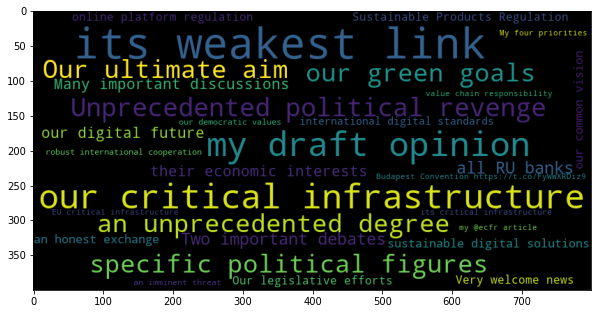

In [89]:
cloud_from_lemmas(word_counts_ngrams)

In [90]:
counts_ngrams = pd.DataFrame(Counter({k: v for k, v in word_counts_ngrams.items()}).most_common(60), columns=['word', 'count'])
plot_counts(counts_ngrams)#count tylko 1

In [91]:
top_15_likes = df_Germany.sort_values(by=['Likes Count'], ascending=False).head(10).Text
for l in top_15_likes: print(l+'\n\n')

Talking with @Google CEO @sundarpichai in Brussels today. 

In times of crisis, #digital platforms must use their powers for good. Google’s efforts to help #Ukraine are welcomed.

We must continue to do more and to utilise the power of #AI and digital solutions. https://t.co/ElNLp9XX4g


“Our task is to break the wall of lies - we need to mobilize out technological potential to win the war of truth. Global internet platforms have a huge role to play.”

Another strong call to act against #Putin’s lies and disinformation by PM @kajakallas 👏🇺🇦

#StandWithUkraine https://t.co/S7511XE0vq


“Prove that you are with us, prove you will not let us go, prove you are indeed European. Then life will win over death, and light will win over darkness. Glory to Ukraine.”

This may be David versus Goliath, but it is @ZelenskyyUa who will be remembered as a giant of our time. https://t.co/JVG179drVA


Delighted to be @EPPGroup rapporter on the Chips Act.

No time to waste in building our digital future.